# Практическая работа №2: Исследование задач о раскрасках

Выполнил студент гр. 9381 Камакин Даниил, вариант 51.

## Цель работы
Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения

### Определение 1
Пусть $G$ - группа с нейтральным элементом $e$, $X$ - множество, тогда $G$ действует на $X$, если задана операция $G \times X \to X$, обладающая следующими свойствами ($\forall x \in X$ и $\forall g,h \in G$): 

1) $ex = x$

2) $g(hx) = (gh)x$

### Определение орбиты
Орбитой $x \in X$ под действием $G$ называется множество $Gx = \{gx | g \in G\}$. Количество элементов в данной орбите называется длиной орбиты. Любые две орбиты либо не пересекаются, либо совпадают.

### Определение неподвижной точки
Неподвижными точками элемента $g \in G$ называются те $x \in X$, для которых $gx = x$. Множество неподвижных точек элемента g обозначается через $X^{g}$.

### Лемма Бёрнсайда
Количество орбит действия группы $G$ на множестве $X$ равно:

$\frac{1}{|G|}\sum_{g \in G} |X^{g}|$


### Определение раскраски
Пусть $I$ - произвольное множество, а $C$ - множество цветов. Раскраской множества $I$ называется функция из $I$ в $C$. Множество всех раскрасок обозначается через $C^{I}$. 


### Определение 2
Количество раскрасок из $C^{I}$, которые сохраняет данный элемент $g \in G$ равно $|C^{c(\varphi(g))}|$, где $c(\varphi(g))$ - количество независимых циклов перестановки $\varphi(g)$ (считая циклы длины 1).

## Постановка задачи

Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.

### Порядок выполнения работы 

1. Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно проинтерпретировать.

2. Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.

3. _Дополнительное необязательное задание: для заданного варианта решить задачу в общем виде._

## Выполнение работы


### Условие задачи

Каждая сторона квадрата разбита на 11 равных частей и через точки деления проведены отрезки, параллельные сторонам квадрата. В получившиеся клеточки вставляют цветные стёкла 3 различных цветов. Сколькими способами можно составить такую мозаику (с точностью до поворотов и осевых симметрий квадрата)?

In [129]:
import random
from sage.plot.matrix_plot import MatrixPlot

amountColors = 3
amountParts = 11

In [131]:
def printMatrix(matrix):
    for i in range(len(matrix)):
        print(matrix[i])

In [132]:
def rotateMatrix(matrix):
    return [list(reversed(col)) for col in zip(*matrix)]

In [133]:
def mirrorVerticalAxisMatrix(matrix): 
    for i in range(len(matrix)):
        matrix[i] = matrix[i][::-1]
    return matrix    

In [134]:
def mirrorHorizontalAxisMatrix(matrix): 
    length = len(matrix)
    for i in range(length // 2):
        for j in range(length):
            x = matrix[i][j]
            matrix[i][j] = matrix[length - 1 - i][j]
            matrix[length - 1 - i][j] = x
    return matrix

In [135]:
def mirrorSideDiagonalMatrix(matrix):
    length = len(matrix) - 1
    for i in range(length):
        for j in range(length - i + 1):
            x = matrix[i][j]
            matrix[i][j] = matrix[length - j][length - i]
            matrix[length - j][length - i] = x
    return matrix        

In [136]:
def mirrorMainDiagonalMatrix(matrix):
    length = len(matrix)
    for i in range(length):
        for j in range(i):
            x = matrix[i][j]
            matrix[i][j] = matrix[j][i]
            matrix[j][i] = x
    return matrix 

In [137]:
def randomOperations(matrix, amount):
    for i in range(amount):
        operation = random.randint(1,5)
        if (operation == 1):
            print("90° rotation: ")
            matrix = rotateMatrix(matrix)
        elif (operation == 2):
            print("mirror relative vertical axis")
            matrix = mirrorVerticalAxisMatrix(matrix)
        elif (operation == 3):
            print("mirror relative horizontal axis")
            matrix = mirrorHorizontalAxisMatrix(matrix)
        elif (operation == 4):
            print("mirror relative main diagonal")
            matrix = mirrorMainDiagonalMatrix(matrix)
        elif (operation == 5):
            print("mirror relative side diagonal")
            matrix = mirrorSideDiagonalMatrix(matrix)
    return matrix     

In [138]:
matrix = []
count = 1
for i in range(amountParts):
    currRow = []
    for j in range(1, amountParts + 1):
        currRow.append(count)
        count += 1
    matrix.append(currRow)  

После деления сторон квадрата на 11 частей и проведения линий, параллельных сторонам, имеем мозаику размером $11x11$, каждый элемент которой принимает один из трёх цветов. Занумеруем места для кусочков мозаики числами от 1 до 121, а цвета - буквами a, b, c. Получаем последовательность $\{x_1, x_2, x_3,...,x_121\}$, $x_i \in \{a, b, c\}$. Всего существует $3^{121}$ способов составить такую мозаику, однако не все из них различны.

Пусть на первом месте стоит красный кусочек, на 11 - белый, на 121 - синий, на 111 - белый. Тогда, после поворота на 90 градусов, на первом месте будет белый цвет, на 11 - красный, на 121 - белый и на 111 - синий. Сами куски при этом такие же как и до поворота. Рассмотрим теперь симметричный поворот. Всего имеем 4 оси симметрии квадрата, рассмотрим поворот относительно центральной (проходит через места $6, 17, 28..$), имеем следующие циклы: $(1, 11), (2, 10), (3, 9),...,(115, 117), 6, 17, 28, 39, 50, 61, 72, 83, 94, 105, 110$ - таких циклов 66 для каждой оси. Таким образом на множестве всех раскрасок $X$ действует группа поворотов и осевых симметрий операция в группе - композиция, она является ассоциативной, нейтральный элемент - тождественное отображение, обратный элемент к осевой симметрии - сама симметрия, обратный элемент к повороту - поворот в другую сторону. Эту группу обозначим как $G$.

Группа $G$ действует на множестве мест $\{1, 2, 3,..., 121\}$. Через $\tau$ обозначим поворот, а последний элемент передвигаем на первый. Необходимо знать сколько циклов в каждой перестановке, который получаются по действием элементов группы $G$.

Имеем изначальное состояние мозаики $\tau^1 = \{1, 2,...,121\}$. В такой перестановке 121 цикл. Рассмотрим поворот на 90 градусов. Получаем следующие циклы: $\tau^2 (1, 11, 121, 111), (12, 10, 110, 112),...,(49, 52, 73, 76), 61$ - таких циклов 31.  

In [139]:
print("Initial state: ")
printMatrix(matrix)

Initial state: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
[67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
[111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]


In [140]:
print("90° rotation: ")
printMatrix(rotateMatrix(matrix))

90° rotation: 
[111, 100, 89, 78, 67, 56, 45, 34, 23, 12, 1]
[112, 101, 90, 79, 68, 57, 46, 35, 24, 13, 2]
[113, 102, 91, 80, 69, 58, 47, 36, 25, 14, 3]
[114, 103, 92, 81, 70, 59, 48, 37, 26, 15, 4]
[115, 104, 93, 82, 71, 60, 49, 38, 27, 16, 5]
[116, 105, 94, 83, 72, 61, 50, 39, 28, 17, 6]
[117, 106, 95, 84, 73, 62, 51, 40, 29, 18, 7]
[118, 107, 96, 85, 74, 63, 52, 41, 30, 19, 8]
[119, 108, 97, 86, 75, 64, 53, 42, 31, 20, 9]
[120, 109, 98, 87, 76, 65, 54, 43, 32, 21, 10]
[121, 110, 99, 88, 77, 66, 55, 44, 33, 22, 11]


Циклы после поворота на $180°$: $\tau^3(1, 121), (2, 120),...,(49, 73), 61$ - всего 61.

In [141]:
print("180° rotation: ")
printMatrix(rotateMatrix(rotateMatrix(matrix)))

180° rotation: 
[121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111]
[110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100]
[99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89]
[88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78]
[77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67]
[66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56]
[55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45]
[44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34]
[33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23]
[22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12]
[11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


Циклы после поворота на $270°$: $\tau^4: (1, 111, 121, 10), (2, 100, 120, 22),...61$ - 31 цикл

In [142]:
print("270° rotation: ")
printMatrix(rotateMatrix(rotateMatrix(rotateMatrix(matrix))))

270° rotation: 
[11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121]
[10, 21, 32, 43, 54, 65, 76, 87, 98, 109, 120]
[9, 20, 31, 42, 53, 64, 75, 86, 97, 108, 119]
[8, 19, 30, 41, 52, 63, 74, 85, 96, 107, 118]
[7, 18, 29, 40, 51, 62, 73, 84, 95, 106, 117]
[6, 17, 28, 39, 50, 61, 72, 83, 94, 105, 116]
[5, 16, 27, 38, 49, 60, 71, 82, 93, 104, 115]
[4, 15, 26, 37, 48, 59, 70, 81, 92, 103, 114]
[3, 14, 25, 36, 47, 58, 69, 80, 91, 102, 113]
[2, 13, 24, 35, 46, 57, 68, 79, 90, 101, 112]
[1, 12, 23, 34, 45, 56, 67, 78, 89, 100, 111]


Таким образом мы рассмотрели все возможные повороты. Для того, чтобы воспользоваться леммой Бёрнсайда, необходимо выяснить, сколько элементов множества $X$ оставляет на месте каждый элемент группы $G$. Воспользуемся Определением 2:

$|X^{\tau^1}| = 3^{121}$

$|X^{\tau^2}| = 3^31$

$|X^{\tau^3}| = 3^61$

$|X^{\tau^4}| = 3^31$

$|G| = 8$

$\frac{1}{|G|}\sum_{g \in G} |X^{g}| = \frac{1}{8}(3^121 + 4*3^66 + 3^31 + 3^61 + 3^31)$

### Графическое отображение
#### Изначальная мозаика:

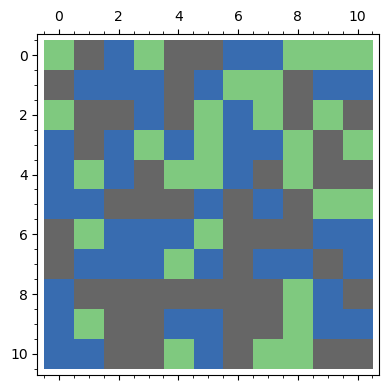

In [143]:
matrix = []
for i in range(amountParts):
    currRow = []
    for j in range(1, amountParts + 1):
        currRow.append(random.randint(1,3))
    matrix.append(currRow) 
    
matrix_plot(matrix, cmap = "Accent").show(fontsize = 10)

#### Поворот на 90°

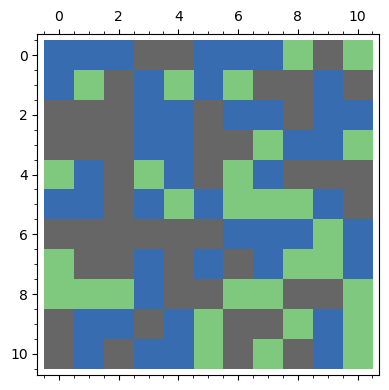

In [144]:
matrix_plot(rotateMatrix(matrix), cmap = "Accent").show(fontsize = 10)

#### Поворот на 180°

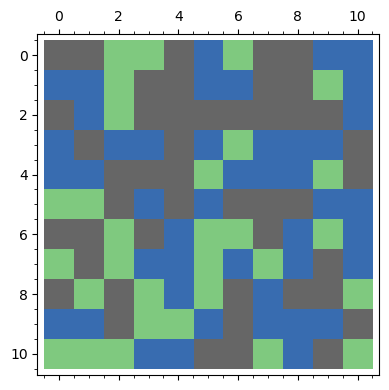

In [145]:
matrix_plot(rotateMatrix(rotateMatrix(matrix)), cmap = "Accent").show(fontsize = 10)

#### Поворот на 270°

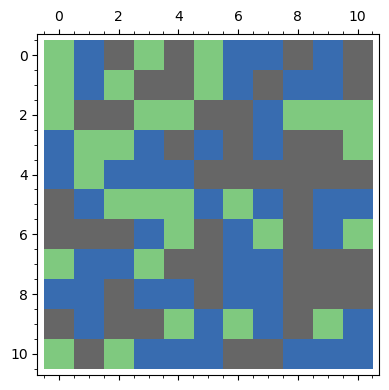

In [146]:
matrix_plot(rotateMatrix(rotateMatrix(rotateMatrix(matrix))), cmap = "Accent").show(fontsize = 10)

#### Симметричное отображение относительно вертикальной оси

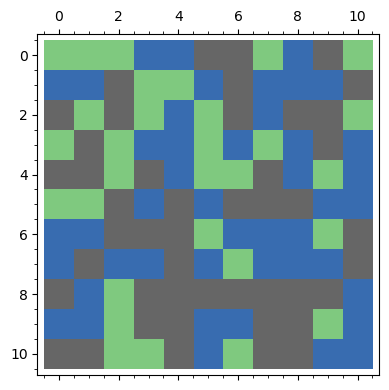

In [147]:
matrix_plot(mirrorVerticalAxisMatrix(matrix), cmap = "Accent").show(fontsize = 10)

#### Симметричное отображение относительно горизонтальной оси

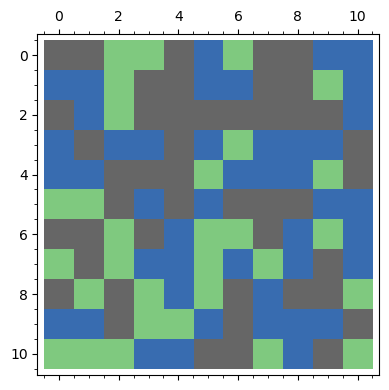

In [148]:
matrix_plot(mirrorHorizontalAxisMatrix(matrix), cmap = "Accent").show(fontsize = 10)

#### Симметричное отображение относительно главной диагонали

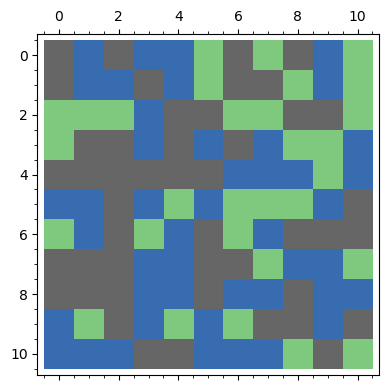

In [149]:
matrix_plot(mirrorMainDiagonalMatrix(matrix), cmap = "Accent").show(fontsize = 10)

#### Симметричное отображение относительно побочной диагонали

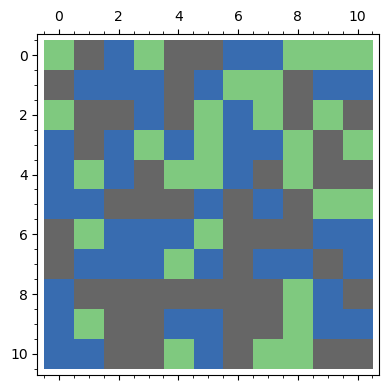

In [150]:
matrix_plot(mirrorSideDiagonalMatrix(matrix), cmap = "Accent").show(fontsize = 10)

#### Случайные операции

Initial state: 


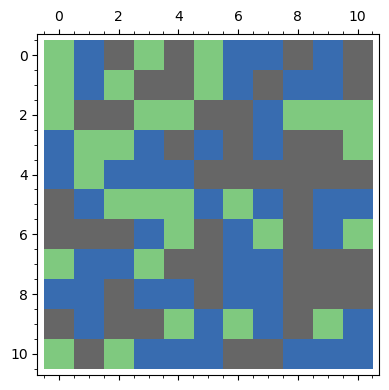

Enter amount of random operations: 10
mirror relative vertical axis
90° rotation: 
mirror relative side diagonal
mirror relative horizontal axis
mirror relative side diagonal
mirror relative main diagonal
mirror relative horizontal axis
mirror relative main diagonal
mirror relative main diagonal
mirror relative horizontal axis


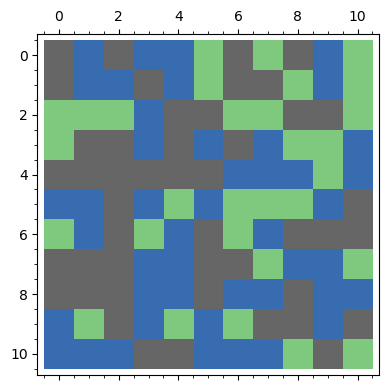

In [153]:
print("Initial state: ")
matrix_plot(matrix, cmap = "Accent").show(fontsize = 10)
matrix_plot(randomOperations(matrix, int(input("Enter amount of random operations: "))), cmap = "Accent").show(fontsize = 10)

## Выводы


Сформировано представления о задачах о раскрасках, выработано умение использование леммы Бёрнсайда для решения задачи о раскрасках, привиты навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.